In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split

if tf.test.is_gpu_available():
    print("yes")
else:
    print("no")


path_save_files = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\EXPERIMENTS\\Model 1\\"


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
yes


In [367]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

predict_paths = []
predict_labels = []

for dirname, _, filenames in os.walk(path + 'ale2'):
    for filename in filenames:
        label = filename.split('_')[-1]
        label = label.split('.')[0]

        if label != "surprised":
            predict_paths.append(os.path.join(dirname, filename))
        # predict_labels.append("happiness")

        if label == "angry":
            predict_labels.append("anger")
        elif label == "disgust":
            predict_labels.append("disgust")
        elif label == "fear":
            predict_labels.append("fear")
        elif label == "happy":
            predict_labels.append("happiness")
        elif label == "sad":
            predict_labels.append("sadness")
        # # train_labels.append(label.lower())

print('TESS Toronto Dataset is loaded')

TESS Toronto Dataset is loaded


In [368]:
predict_labels[:10]

['anger', 'disgust', 'fear', 'happiness', 'sadness']

In [369]:
predict_paths[:10]

['C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\ale2\\ale_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\ale2\\ale_disgust.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\ale2\\ale_fear.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\ale2\\ale_happy.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\ale2\\ale_sad.wav']

In [370]:
df_predict = pd.DataFrame()
df_predict['speech'] = predict_paths
df_predict['label'] = predict_labels
df_predict.head()
df_predict.to_csv(path_save_files + 'predict.csv', index=False)

In [371]:
df_predict['label'].value_counts()

anger        1
disgust      1
fear         1
happiness    1
sadness      1
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

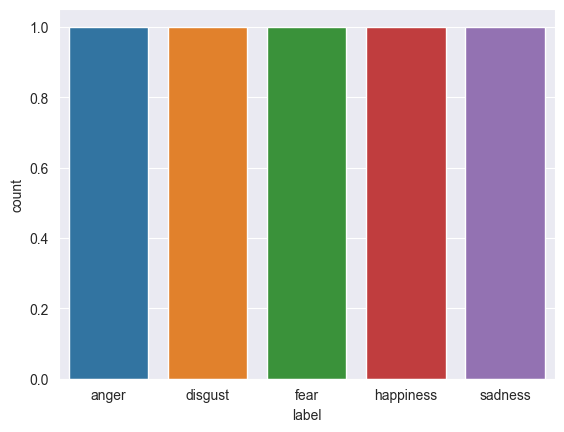

In [372]:
sns.countplot(df_predict, x='label')

In [373]:
def waveform(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title("Waveplot for audio with {} emotion".format(emotion), size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()

def spectrogram(data, sample_rate, emotion):

    # stft function converts the data into short term fourier transform
    x = librosa.stft(data)

    # converting the file to decibels
    xdb = librosa.amplitude_to_db(np.abs(x))

    plt.figure(figsize=(11,4))
    plt.title("Spectrogram for audio with {} emotion".format(emotion), size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

In [374]:
def extract_ZCR(signal):
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    return zcr

def extract_root_mean_square_value(signal):
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)
    return rms

def extract_mel_spectrogram(signal, sample_rate):
    mel = np.mean(librosa.feature.melspectrogram(y=signal, sr=sample_rate).T, axis=0)
    return mel

def extract_mfcc(signal, sample_rate):
    # signal, sample_rate = librosa.load(file_name, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfcc

In [375]:
def extract_features(sig, sr):

    result = np.array([])

    # We are stacking the features horizontally

    result = np.hstack((result, extract_ZCR(sig)))
    result = np.hstack((result, extract_mel_spectrogram(sig, sr)))
    result = np.hstack((result, extract_root_mean_square_value(sig)))
    result = np.hstack((result, extract_mfcc(sig, sr)))

    return result

In [376]:
def get_features(file_name):

    signal, sample_rate =  librosa.load(file_name, duration=5, offset=0.5)


    result1 = extract_features(signal, sample_rate)
    result = np.array(result1)


    return result

In [455]:
x_predict = get_features(df_predict['speech'][0])

In [456]:
y_predict = df_predict['label'][0]
expected = y_predict
print(y_predict)

anger


In [457]:
predicts = pd.DataFrame(x_predict)
predicts['labels'] = y_predict

In [458]:
x_predict = predicts.iloc[:, :-1].values
y_predict = predicts['labels'].values

In [459]:
x_predict.shape

(170, 1)

In [460]:
y_predict

array(['anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'ang

In [461]:
x_predict

array([[ 1.53753983e-01],
       [ 1.17891957e-03],
       [ 2.13239305e-02],
       [ 2.61282533e-01],
       [ 9.74641323e-01],
       [ 2.45552540e+00],
       [ 4.53642756e-01],
       [ 8.96032453e-01],
       [ 1.65808249e+00],
       [ 3.68486190e+00],
       [ 1.58014810e+00],
       [ 1.79016352e+00],
       [ 4.14174318e+00],
       [ 1.60356998e+00],
       [ 1.37882376e+00],
       [ 5.19982517e-01],
       [ 3.69827658e-01],
       [ 3.36016059e-01],
       [ 1.08064806e+00],
       [ 1.24972129e+00],
       [ 1.76911283e+00],
       [ 1.66349673e+00],
       [ 3.32163119e+00],
       [ 6.56594801e+00],
       [ 4.03807020e+00],
       [ 1.48540902e+00],
       [ 2.01059246e+00],
       [ 1.74914610e+00],
       [ 1.15405011e+00],
       [ 9.98710155e-01],
       [ 5.08948267e-01],
       [ 2.03478381e-01],
       [ 1.77622989e-01],
       [ 6.59108385e-02],
       [ 8.71528983e-02],
       [ 2.68129408e-01],
       [ 4.06694621e-01],
       [ 7.06373572e-01],
       [ 1.4

In [462]:
# x_predict = [x[0] for x in x_predict]
x_predict = np.array(x_predict)
x_predict.shape

(170, 1)

In [463]:
x_predict = np.transpose(x_predict)
x_predict.shape

(1, 170)

In [464]:
import joblib

scaler = joblib.load(path_save_files + 'scaler.pk1')
x_predict = scaler.transform(x_predict)

In [465]:
xx = np.expand_dims(x_predict, axis=2)

In [466]:
xx.shape

(1, 170, 1)

In [467]:
from keras.models import load_model

model = load_model(path_save_files + "training_model_experiment_x.h5")

In [468]:
result = model.predict(xx)


1/1 [==============================] - 1s 761ms/step


In [469]:
features = pd.read_csv(path_save_files + 'features.csv')

In [470]:
X = features.iloc[:, :-1].values
Y = features['labels'].values

In [471]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_train = enc.fit_transform(Y.reshape(-1, 1))

In [472]:
enc.inverse_transform(result.reshape(1, -1))

array([['disgust']], dtype=object)

In [473]:
# We take the models prediction
prediction = model.predict(xx)
print(prediction)

# We take the index of the greatest predicted probability
prediction_index = np.argmax(prediction)
print(prediction_index)

# We convert the index to a one-hot encoder vector
prediction_index_2d = np.zeros_like(prediction)
print(prediction_index_2d)
prediction_index_2d[0][prediction_index] = 1
print(prediction_index_2d)

# Inverse transform the one-hot encoded vector to get the predicted label
prediction_label_enc = enc.inverse_transform(prediction_index_2d)
prediction_label = prediction_label_enc[0][0]


print("Expected prediction: ", expected)
print("Actual predict: ", prediction_label)


1/1 [==============================] - 0s 33ms/step
[[1.3271295e-03 9.9642050e-01 1.2577772e-04 2.0822603e-03 4.4289107e-05]]
1
[[0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]]
Expected prediction:  anger
Actual predict:  disgust


In [434]:
print(result)

[[5.1123451e-04 9.9915946e-01 2.3444311e-05 1.3353727e-04 1.7240018e-04]]


In [435]:
res = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad'}


In [344]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define the labels and fit the OneHotEncoder
y_train = np.array(['anger', 'anger', 'sad', 'sad', 'happy', 'happy', 'sad', 'happy', 'anger'])
enc = OneHotEncoder()
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))

# Define the predicted probabilities
y_pred = np.array([3.7697814e-02, 1.7825259e-03, 1.9459509e-04])

# Get the index of the highest probability
pred_index = np.argmax(y_pred)


# Convert the index to a one-hot encoded vector
pred_index_2d = np.zeros_like(y_pred)
pred_index_2d[pred_index] = 1

# Inverse transform the one-hot encoded vector to get the predicted label
pred_label_enc = enc.inverse_transform(pred_index_2d.reshape(1, -1))
pred_label = pred_label_enc[0][0]

# Print the predicted label
print(pred_label)

[1. 0. 0.]
[[1. 0. 0.]]
anger
